In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [10]:
#Set sample sizes to be extracted from Benign, attack type 1 and attack type 2 respectively
sample1=2000
sample2=1000
sample3=1000
destination_file='final_destination2.csv'

In [11]:
benign_samsung=pd.read_csv("samsung/benign_traffic.csv")

In [12]:
benign_samsung.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,70.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,70.000000,0.000000,70.000000,0.000000,0.0,0.0
2,1.000008,89.999836,0.003289,1.000889,89.982231,0.355061,1.096162,88.245473,32.012169,1.791226,...,0.000000,0.0,0.0,1.000000,90.000000,0.000000,90.000000,0.000000,0.0,0.0
3,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,322.000000,0.000000,1.000000,...,9451.090408,0.0,0.0,11.163562,380.087760,92.127549,380.087760,8487.485312,0.0,0.0
4,1.784845,328.723273,35.476876,1.864710,328.435318,35.810498,1.952701,328.145333,35.978878,1.995166,...,7867.202818,0.0,0.0,12.158154,376.297073,89.161260,376.297073,7949.730316,0.0,0.0


In [13]:
benign_samsung.shape

(52150, 115)

In [14]:
benign_samsung['source']='samsung'
benign_samsung['output']='benign'
benign_samsung['attack_type']='None'

In [15]:
malign_samsung=pd.read_csv("samsung/gafgyt_attacks/combo.csv")

In [16]:
malign_samsung.shape

(58669, 115)

In [17]:
malign_samsung['source']='samsung'
malign_samsung['output']='attack'
malign_samsung['attack_type']='gafgyt'

**We will sample 800 instances from the benign dataset and 800 instances from the malicious dataset**

In [18]:
combined_data=pd.concat([benign_samsung.sample(n=sample1),malign_samsung.sample(n=sample2)])

In [19]:
struct=pd.read_csv("demonstrate_structure.csv")

In [20]:
combined_data.reset_index(inplace=True)

<AxesSubplot:xlabel='output', ylabel='count'>

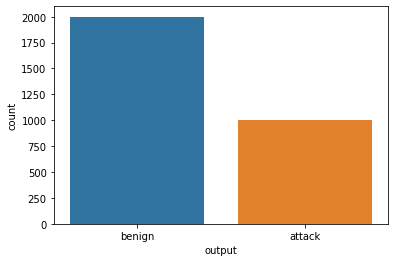

In [21]:
sns.countplot(x='output',data=combined_data)

In [22]:
combined_data.drop('index',axis=1,inplace=True)

In [23]:
combined_data.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,2.979897,456.515870,371.700595,2.987890,456.443004,372.715179,2.995948,456.369841,373.755653,4.000143,...,15.974548,456.333475,19.344776,456.333475,3.742204e+02,0.000000e+00,0.000000e+00,samsung,benign,None
1,1.000000,429.000000,0.000133,1.000004,428.998549,0.535599,1.016685,423.005222,2162.062877,3.241126,...,13.978410,454.377983,19.926723,454.377983,3.970743e+02,0.000000e+00,0.000000e+00,samsung,benign,None
2,1.000000,429.000000,0.000000,1.000000,429.000000,0.000006,1.000370,428.864646,49.695641,2.666670,...,13.980002,454.378263,19.926658,454.378263,3.970717e+02,0.000000e+00,0.000000e+00,samsung,benign,None
3,3.363795,428.064755,6678.795429,3.549155,416.732858,8746.940648,3.820229,401.982767,11056.308330,5.111517,...,15.978757,456.333422,19.344796,456.333422,3.742211e+02,0.000000e+00,0.000000e+00,samsung,benign,None
4,1.000000,60.000001,0.000179,1.000044,60.002257,0.300567,1.055247,63.499012,467.375232,3.200599,...,4.907064,60.000000,0.000001,84.852814,1.440000e-12,-8.350000e-30,-1.060000e-17,samsung,benign,None


In [24]:
combined_data.to_csv('combined_samsung_data.csv',index=False)

# UNSW

In [25]:
unsw=pd.read_csv('UNSW/UNSW_2018_IoT_Botnet_Final_10_Best.csv',sep=';')

c:\users\mihee\appdata\local\programs\python\python36\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (4,6) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [26]:
cols=unsw.columns[0].split(';')

In [27]:
cols[0]='index'

In [28]:
unsw_dict=unsw.to_numpy()

<AxesSubplot:xlabel='attack', ylabel='count'>

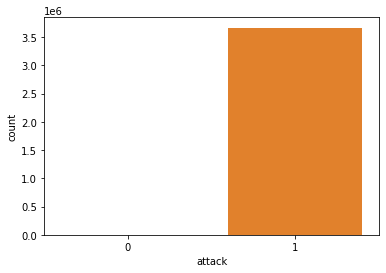

In [29]:
sns.countplot(x='attack',data=unsw)

In [30]:
unsw['attack'].value_counts()

1    3668045
0        477
Name: attack, dtype: int64

# Doorbell

In [31]:
door_benign=pd.read_csv("Danmini_doorbell/benign_traffic.csv")

In [32]:
door_benign.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,60.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0
1,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,354.000000,0.000000,1.000000,...,34.095047,0.0,0.0,5.319895,344.262695,4.710446,344.262695,22.188299,0.0,0.0
2,1.857879,360.458980,35.789338,1.912127,360.275733,35.923972,1.969807,360.091968,35.991542,1.996939,...,100.081513,0.0,0.0,6.318264,347.703087,9.034660,347.703087,81.625077,0.0,0.0
3,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,337.000000,0.000000,1.000000,...,0.000000,0.0,0.0,1.000000,337.000000,0.000000,337.000000,0.000000,0.0,0.0
4,1.680223,172.140917,18487.448750,1.793580,182.560279,18928.175300,1.925828,193.165753,19153.795810,1.992323,...,0.000000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.000000,0.0,0.0


In [33]:
door_benign.shape

(49548, 115)

In [34]:
door_benign['source']='danmini_doorbell'
door_benign['output']='benign'
door_benign['attack_type']='None'

In [35]:
door_gafgyt=pd.read_csv("Danmini_doorbell/gafgyt_attacks/combo.csv")

In [36]:
door_gafgyt.shape

(59718, 115)

In [37]:
door_gafgyt['source']='danmini_doorbell'
door_gafgyt['output']='attack'
door_gafgyt['attack_type']='gafgyt'

In [38]:
door_mirai=pd.read_csv("Danmini_doorbell/mirai_attacks/ack.csv")

In [39]:
door_mirai.shape

(102195, 115)

In [40]:
door_mirai['source']='danmini_doorbell'
door_mirai['output']='attack'
door_mirai['attack_type']='mirai'

In [41]:
door_combined=pd.concat([door_benign.sample(n=sample1),door_gafgyt.sample(n=sample2),door_mirai.sample(n=sample3)])

In [42]:
door_combined.reset_index(inplace=True)
door_combined.head()

,index,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,27650,1.022034,97.180746,3.046049e+01,1.101371,94.502929,1.206612e+02,1.534603,86.632792,3.102232e+02,...,5.306879,98.0,1.350000e-06,138.592929,1.820000e-12,-2.110000e-29,0.000000e+00,danmini_doorbell,benign,None
1,31003,1.000000,60.000004,1.474110e-04,1.000132,60.004529,1.901972e-01,1.168802,65.030538,1.858597e+02,...,5.911009,60.0,6.740000e-07,84.852814,6.430000e-13,2.820000e-30,6.200000e-18,danmini_doorbell,benign,None
2,35287,1.000000,101.999998,7.390000e-06,1.000158,101.999368,2.528029e-03,1.054067,101.794825,7.786040e-01,...,3.734928,102.0,1.910000e-06,144.249783,5.140000e-12,2.590000e-28,7.130000e-17,danmini_doorbell,benign,None
3,10284,1.000000,102.000000,0.000000e+00,1.000000,102.000000,2.110000e-10,1.000050,101.997934,8.654790e-02,...,4.218956,102.0,1.350000e-06,144.249783,2.570000e-12,1.750000e-28,9.640000e-17,danmini_doorbell,benign,None
4,6151,4.998274,102.000000,3.640000e-12,4.998964,102.000000,0.000000e+00,4.999655,102.000000,4.420000e-08,...,4.219352,102.0,1.910000e-06,144.249783,4.070000e-12,-3.910000e-29,-1.520000e-17,danmini_doorbell,benign,None


In [43]:
door_combined.drop('index',axis=1,inplace=True)

In [44]:
door_combined.to_csv('door_combined.csv',index=False)

<AxesSubplot:xlabel='output', ylabel='count'>

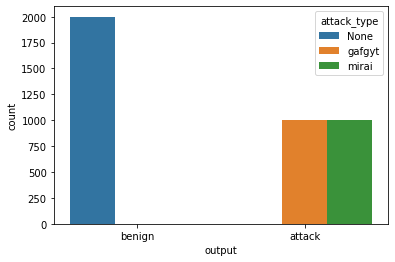

In [45]:
sns.countplot(x='output',data=door_combined,hue='attack_type')

# Philips

In [46]:
philips_benign=pd.read_csv('Philips/benign_traffic.csv')

In [47]:
philips_benign.head()

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.1_radius,HpHp_L0.1_covariance,HpHp_L0.1_pcc,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc
0,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
1,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0
2,1.000000,342.0,0.000000e+00,1.000000,342.0,0.0,1.000000,342.0,0.0,1.000000,...,15022.29970,0.0,0.0,6.249414,449.603272,122.911136,449.603272,15107.14730,0.0,0.0
3,1.963325,342.0,4.370000e-11,1.977831,342.0,0.0,1.992555,342.0,0.0,1.999253,...,14812.15211,0.0,0.0,7.248947,434.759286,120.000074,434.759286,14400.01777,0.0,0.0
4,1.000000,60.0,0.000000e+00,1.000000,60.0,0.0,1.000000,60.0,0.0,1.000000,...,0.00000,0.0,0.0,1.000000,60.000000,0.000000,60.000000,0.00000,0.0,0.0


In [48]:
philips_benign.shape

(175240, 115)

In [49]:
philips_benign['source']='philips_sec_cam'
philips_benign['output']='benign'
philips_benign['attack_type']='None'

In [50]:
philips_gafgyt=pd.read_csv('Philips/gafgyt_attacks/combo.csv')

In [51]:
philips_gafgyt.shape

(58152, 115)

In [52]:
philips_gafgyt['source']='philips_sec_cam'
philips_gafgyt['output']='attack'
philips_gafgyt['attack_type']='gafgyt'

In [53]:
philips_mirai=pd.read_csv('Philips/mirai_attacks/ack.csv')

In [54]:
philips_mirai.shape

(91123, 115)

In [55]:
philips_mirai['source']='philips_sec_cam'
philips_mirai['output']='attack'
philips_mirai['attack_type']='mirai'

In [56]:
philips_combined=pd.concat([philips_benign.sample(n=sample1),philips_gafgyt.sample(n=sample2),philips_mirai.sample(n=sample3)])

In [57]:
philips_combined.shape

(4000, 118)

In [58]:
philips_combined.to_csv('philips_combined.csv',index=False)

<AxesSubplot:xlabel='output', ylabel='count'>

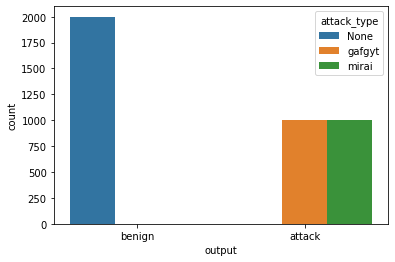

In [59]:
sns.countplot(x='output',data=philips_combined,hue='attack_type')

In [60]:
philips_combined.reset_index(inplace=True,drop=True)

In [61]:
philips_combined

,MI_dir_L5_weight,MI_dir_L5_mean,MI_dir_L5_variance,MI_dir_L3_weight,MI_dir_L3_mean,MI_dir_L3_variance,MI_dir_L1_weight,MI_dir_L1_mean,MI_dir_L1_variance,MI_dir_L0.1_weight,...,HpHp_L0.01_weight,HpHp_L0.01_mean,HpHp_L0.01_std,HpHp_L0.01_magnitude,HpHp_L0.01_radius,HpHp_L0.01_covariance,HpHp_L0.01_pcc,source,output,attack_type
0,1.000003,66.000019,3.103280e-04,1.000645,66.004438,7.249292e-02,1.210332,66.799217,18.110176,11.497151,...,20.055346,88.676152,3.886673e+01,122.950045,1.641638e+03,7.402498e+01,7.513016e-02,philips_sec_cam,benign,None
1,1.146462,144.519694,9.000804e+02,1.352347,132.801476,1.530156e+03,2.392851,106.047305,1812.059049,11.251639,...,21.310628,99.507793,4.313658e+01,127.922557,1.937789e+03,9.126347e+01,9.096828e-02,philips_sec_cam,benign,None
2,3.226065,74.016864,6.572476e+02,3.435992,78.395140,9.619231e+02,3.857380,84.181893,1305.783190,12.887876,...,20.526290,66.034326,6.417534e-01,119.296273,4.277644e+02,-4.348528e-01,-3.276211e-02,philips_sec_cam,benign,None
3,1.000358,66.000124,1.977067e-03,1.010252,66.013566,2.168733e-01,1.431160,67.061746,15.860751,10.427898,...,17.200111,87.841780,3.858363e+01,121.249655,1.618023e+03,1.061321e+02,1.092563e-01,philips_sec_cam,benign,None
4,1.999997,66.000005,4.706380e-04,2.000163,66.003107,2.796057e-01,2.097191,67.787068,155.574872,10.537523,...,20.806204,66.631514,2.679432e+00,115.633889,2.422307e+02,-1.057095e+00,-2.535432e-02,philips_sec_cam,benign,None
5,1.002704,66.000000,2.490000e-07,1.045255,65.999927,4.407070e-04,1.848905,65.956684,3.373730,11.859244,...,19.752430,88.278205,3.892731e+01,122.374409,1.676344e+03,8.004396e+01,7.679919e-02,philips_sec_cam,benign,None
6,1.988381,66.000000,9.090000e-13,1.993093,66.000000,9.090000e-13,2.045932,65.999989,0.000093,8.947076,...,21.070248,66.822983,3.032902e+00,115.956529,2.370366e+02,3.043920e+00,6.521250e-02,philips_sec_cam,benign,None
7,1.358703,70.224056,4.974224e+01,1.540891,71.612941,5.830365e+01,1.944894,73.040863,88.194279,9.797665,...,18.357986,70.275122,7.051408e+00,99.928964,7.433709e+01,4.589837e+00,8.756190e-02,philips_sec_cam,benign,None
8,1.000000,66.000010,8.699110e-04,1.000148,66.005926,5.333178e-01,1.093557,69.323525,288.071432,8.258434,...,19.997434,66.213167,1.585107e+00,114.840809,2.551976e+02,-3.531763e-01,-1.394778e-02,philips_sec_cam,benign,None
9,1.999974,66.000000,1.290000e-06,2.001122,66.000090,8.126197e-03,2.164285,66.524917,46.942802,10.626371,...,18.619625,66.042357,7.116773e-01,116.027367,2.234866e+02,-3.228288e-01,-3.034338e-02,philips_sec_cam,benign,None


# Security Cam

In [62]:
sec_benign=pd.read_csv('Security_cam/benign_traffic.csv')

In [63]:
sec_benign.shape

(19528, 115)

In [64]:
sec_benign['source']='security_cam'
sec_benign['output']='benign'
sec_benign['attack_type']='None'

In [65]:
sec_gafgyt=pd.read_csv('Security_cam/gafgyt_attacks/combo.csv')

In [66]:
sec_gafgyt['source']='security_cam'
sec_gafgyt['output']='attack'
sec_gafgyt['attack_type']='gafgyt'

In [67]:
sec_gafgyt.shape

(59398, 118)

In [68]:
sec_mirai=pd.read_csv('Security_cam/mirai_attacks/ack.csv')

In [69]:
sec_mirai.shape

(107187, 115)

In [70]:
sec_mirai['source']='security_cam'
sec_mirai['output']='attack'
sec_mirai['attack_type']='mirai'

In [71]:
sec_combined=pd.concat([sec_benign.sample(n=sample1),sec_gafgyt.sample(n=sample2),sec_mirai.sample(n=sample3)])

<AxesSubplot:xlabel='output', ylabel='count'>

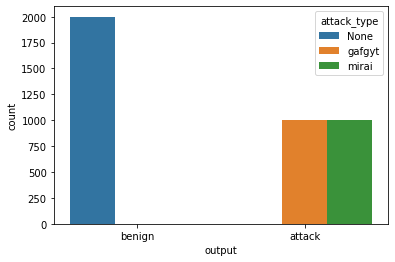

In [72]:
sns.countplot(x='output',data=sec_combined,hue='attack_type')

In [73]:
sec_combined.reset_index(inplace=True)

In [74]:
sec_combined.drop('index',axis=1,inplace=True)

In [75]:
sec_combined.to_csv('security_cam_combined.csv',index=False)

In [76]:
final_df=pd.concat([combined_data,door_combined,philips_combined,philips_combined,sec_combined])

In [77]:
final_df.shape

(19000, 118)

In [78]:
final_df.reset_index(inplace=True,drop=True)

<AxesSubplot:xlabel='output', ylabel='count'>

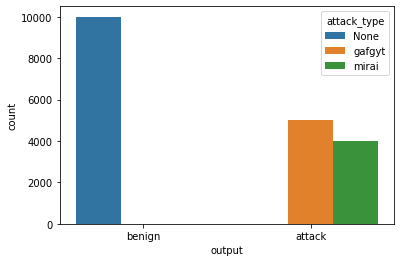

In [79]:
sns.countplot(x='output',hue='attack_type',data=final_df)

In [80]:
final_df.shape

(19000, 118)

In [81]:
final_df.to_csv(destination_file,index=False)

In [82]:
final_df.shape

(19000, 118)